In [1]:
# Kaushal Banthia
# 19CS10039
# Question 9

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.random.normal(size = (500, 2))

# data is a matrix with 2 features (x1 and x2) and 500 examples (500 random vectors) (shape: 500 x 2)

In [4]:
y = []
for i in range(500):
  if data[i][0] * data[i][1] >= 0:
    y.append(1)
  else:
    y.append(-1)


In [5]:
df = pd.DataFrame(data)

In [6]:
df[2] = [1]*500       # column of 1s
df[3] = df[0]*df[1]   # column of x1*x2
df[4] = df[0]*df[0]   # column of x1^2
df[5] = df[1]*df[1]   # column of x2^2
df['y'] = y

In [7]:
df

,0,1,2,3,4,5,y
0,0.662670,0.355158,1,0.235352,0.439131,0.126137,1
1,-0.982248,-0.254780,1,0.250257,0.964811,0.064913,1
2,1.292112,-0.617441,1,-0.797802,1.669553,0.381233,-1
3,-0.847413,0.749872,1,-0.635452,0.718109,0.562308,-1
4,0.074795,-1.066876,1,-0.079797,0.005594,1.138224,-1
...,...,...,...,...,...,...,...
495,0.169401,-0.677500,1,-0.114769,0.028697,0.459006,-1
496,0.042101,0.143737,1,0.006052,0.001773,0.020660,1
497,-0.295761,0.645985,1,-0.191057,0.087475,0.417297,-1
498,0.050363,0.579753,1,0.029198,0.002536,0.336114,1


In [8]:
X = np.array(df.drop('y', axis = 1))

In [9]:
coeff = np.linalg.inv(X.T@X)@X.T@y

In [10]:
coeff

array([ 6.94230086e-02, -2.41368450e-02, -2.37861495e-02,  6.69312577e-01,
        4.18716816e-02, -3.27387759e-04])

In [11]:
def predict(coeff, x):
  ans = np.dot(x, coeff)
  for i in range(len(ans)):
    if ans[i] >= 0:
      ans[i] = 1
    else:
      ans[i] = -1
  return ans

In [12]:
final_ans = predict(coeff, X)

In [13]:
# (a)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y, final_ans)
print(cf)
print("Error Rate = " + str(100 * (cf[0][1] + cf[1][0])/500) + "%")

[[243   3]
 [ 21 233]]
Error Rate = 4.8%


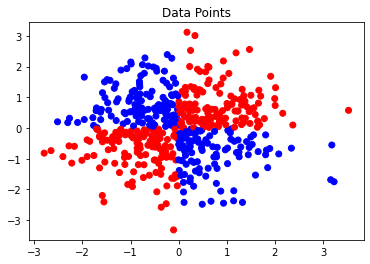

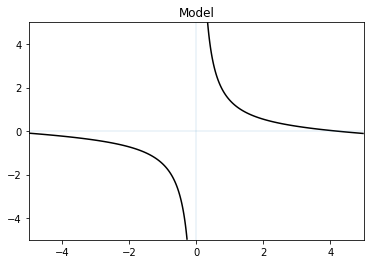

In [14]:
# (b)
fig, ax = plt.subplots()
colors = {1:'red', -1:'blue'}
ax.scatter(df[0], df[1], c=df['y'].map(colors))
plt.title("Data Points")  # Red for 1 and Blue for -1
plt.show()

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
x_ = np.linspace(-5, 5, 400)
y_ = np.linspace(-5, 5, 400)
x_, y_ = np.meshgrid(x_, y_)
a = coeff[0]
b = coeff[1]
c = coeff[2]
d = coeff[3]
e = coeff[4]
f = coeff[5]
axes()
plt.contour(x_, y_,(a*x_ + b*y_ + c + d*x_*y_ + e*x_*x_ + f*y_*y_), [1], colors='k')
plt.title("Model")
plt.show()

In [15]:
# (c)
# if the polynomial is f = x1x2, then
# Then the output is sign(x1x2)
# This is exactly how we defined our y to be
# Thus, there would be zero error
# This is demonstrated below

In [16]:
new_X = np.array(df[3])
new_ans = []

for i in new_X:
    if i >= 0:
        new_ans.append(1)
    else:
        new_ans.append(-1)
new_ans = np.array(new_ans)

new_cf = confusion_matrix(y, new_ans)
print(new_cf)
print("Error Rate = " + str(100 * (new_cf[0][1] + new_cf[1][0])/500) + "%")

[[246   0]
 [  0 254]]
Error Rate = 0.0%
